# Minimal image classifier to debug MixUo in FastAI v 2.2.5
#### Pretty much straight from the FastBook demo code

Error is generated when using the `MixUp` callback.  

<br>
<br>

In [1]:
# !pip install -Uqq fastbook
import fastbook
from fastbook import *
fastbook.setup_book()
import fastai
from platform import python_version
import torch


MIXUP_FLAG = True

ARCH = resnet18
EPOCHS = 1
BATCH_SIZE = 32

path = untar_data(URLs.PETS)

import torch
print('CUDA available: '.ljust(24), torch.cuda.is_available())
print(f'fastai version:          {fastai.__version__}')
print(f'fastbook version:        {fastbook.__version__}')
print(f'cuda version:            {torch.version.cuda}')
print(f'torch version:           {torch.__version__}')
print(f'python version:          {python_version()}')

CUDA available:          True
fastai version:          2.2.5
fastbook version:        0.0.16
cuda version:            11.0
torch version:           1.7.0
python version:          3.8.6


In [2]:
Path.BASE_PATH = path
# fname = (path/"images").ls()[0]

In [3]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/"images")


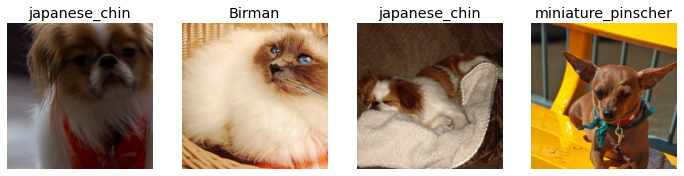

In [4]:
dls.show_batch(nrows=1, ncols=4)

<br>
<br>

In [5]:
# cbs = []

# COMMENT THIS LINE OUT TO TEST WITHOUT MIXUP
cbs = [MixUp]

In [6]:
print()
print(f'ARCH:       {ARCH}')
print(f'EPOCHS:     {EPOCHS}')
print(f'init bs:    {cbs}')


ARCH:       <function resnet18 at 0x7f549510fc10>
EPOCHS:     1
init bs:    [<class 'fastai.callback.mixup.MixUp'>]


<br>
<br>

In [7]:
learn = cnn_learner(dls, ARCH, metrics=[error_rate, accuracy], cbs=cbs)
learn.fit_one_cycle(EPOCHS)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.453311,0.526800,0.148173,0.851827,00:22


<br>
<br>

In [8]:
print(f'\nFinal cbs = {learn.cbs}\n')


Final cbs = [TrainEvalCallback, Recorder, ProgressCallback, MixUp]



### First Sign of error:

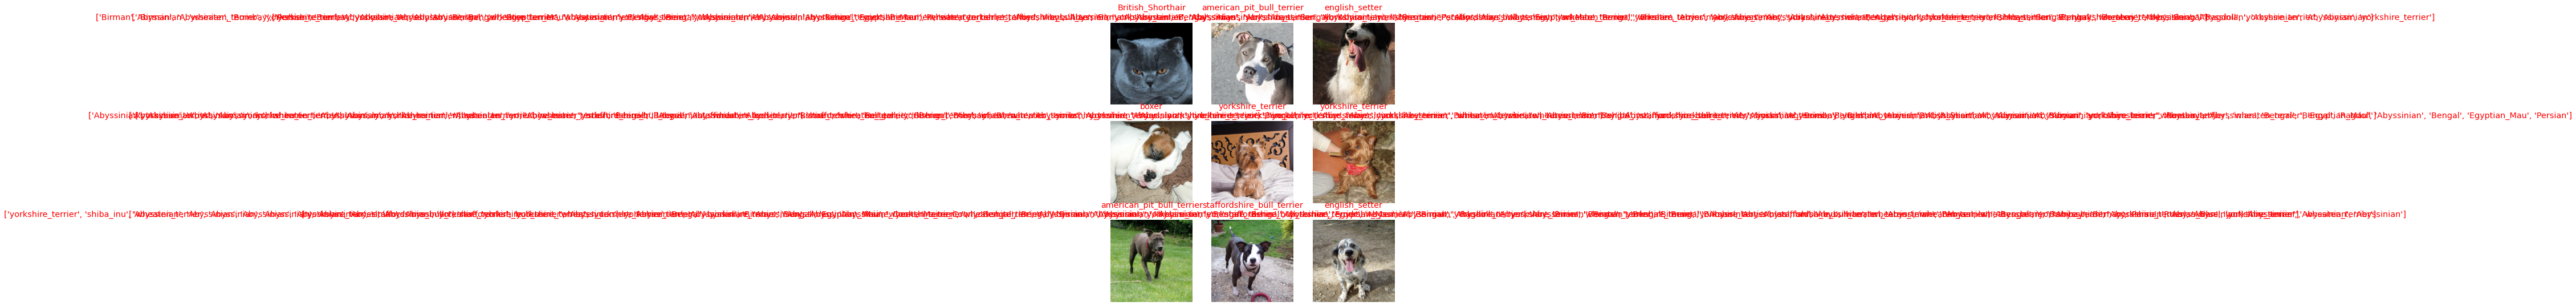

In [9]:
learn.show_results()

<br>

### Second Sign of Error:

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8))

AssertionError: ==:
54686
1478

In [ ]:
learn.cbs